In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import date
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, OneHotEncoder, OrdinalEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.feature_selection import mutual_info_classif, SelectKBest, VarianceThreshold
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_recall_curve, r2_score, mean_absolute_error, mean_squared_error, silhouette_score
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.cluster import KMeans
from xgboost import XGBRegressor
from sklearn.decomposition import PCA
from scipy.stats import skew, skewtest, pearsonr, spearmanr, normaltest
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')

import missingno as msno

from scipy.stats import spearmanr

In [ ]:
def color(val):
    if val > 0.4:
        return 'background: skyblue'
    if val < -0.4:
        return 'background: pink'

# LOAD DATA

In [ ]:
 dataset = pd.read_csv("/content/marketing_campaign_data.csv").drop("Unnamed: 0", axis = 1)
 dataset.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,S1,Menikah,61223000.0,0,1,13-06-2013,46,709000,43000,182000,42000,118000,247000,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,S3,Bertunangan,64014000.0,2,1,10-06-2014,56,406000,0,30000,0,0,8000,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,S1,Cerai,56981000.0,0,0,25-01-2014,91,908000,48000,217000,32000,12000,24000,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,S2,Bertunangan,69245000.0,0,1,24-01-2014,8,428000,30000,214000,80000,30000,61000,2,6,5,10,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,S3,Menikah,52869000.0,1,1,15-10-2012,40,84000,3000,61000,2000,1000,21000,3,3,1,4,7,0,0,0,0,0,0,3,11,1


In [ ]:
print("There are {} rows and {} column in dataset".format(dataset.shape[0], dataset.shape[1]))
print("There are {} numeric columns and {} cat columns".format(len(dataset.select_dtypes("number").columns), len(dataset.select_dtypes("object").columns)))

There are 2240 rows and 29 column in dataset
There are 26 numeric columns and 3 cat columns


In [ ]:
dataset["ID"].duplicated().sum()

0

No duplicate ID

# EDA

In [ ]:
# dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntCoke              2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Change `Dt_Customer` data type with datetime

In [ ]:
# percent of null values
dataset.isna().sum()/len(dataset)

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 0.010714
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntCoke                0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

`Income` column has < 10 % null values, impute null values with mean simple imputer 

In [ ]:
data_num = dataset.select_dtypes("number")
data_cat = dataset.select_dtypes("object")

**Univariat Numeric**

1. ID


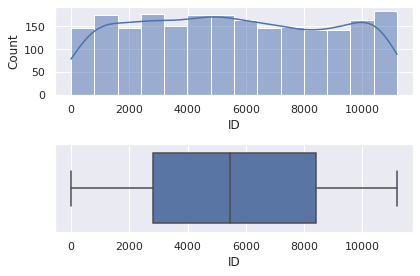

skewtest: SkewtestResult(statistic=0.771361777633173, pvalue=0.4404925240926906)
skw: 0.03980519471046203
count     2240.000000
mean      5592.159821
std       3246.662198
min          0.000000
25%       2828.250000
50%       5458.500000
75%       8427.750000
max      11191.000000
Name: ID, dtype: float64
Nilai max di luar outlier = 7059
Nilai min di luar outlier = 0
Jumlah outlier = 802
Outlier = [7446, 8180, 9736, 9360, 7892, 9422, 7373, 8755, 10738, 10755, 8595, 8601, 8430, 7281, 9909, 7286, 7244, 8614, 9381, 10383, 7437, 8557, 8375, 8082, 9369, 10629, 8132, 7503, 10401, 8504, 8996, 9235, 11178, 7516, 7247, 11100, 9370, 8908, 8373, 7533, 10991, 7431, 9215, 9862, 9805, 8442, 7386, 7215, 11071, 8268, 11051, 8026, 9597, 9579, 7660, 11084, 8690, 9701, 9949, 10837, 7987, 7798, 10240, 9283, 9970, 9260, 8182, 10095, 8475, 10573, 8717, 10314, 10854, 10492, 7698, 10562, 10796, 9733, 7829, 7224, 9938, 7300, 10424, 8727, 7264, 9076, 7079, 7375, 9617, 9449, 7297, 11004, 9940, 10735, 9529, 7411,

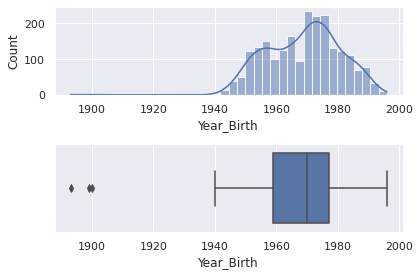

skewtest: SkewtestResult(statistic=-6.589416703750049, pvalue=4.415578751435161e-11)
skw: -0.349709478173819
count    2240.000000
mean     1968.805804
std        11.984069
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64
Nilai max di luar outlier = 1996
Nilai min di luar outlier = 1893
Jumlah outlier = 0
Outlier = []
----------------------------------------------------------------------------------------------------
3. Income


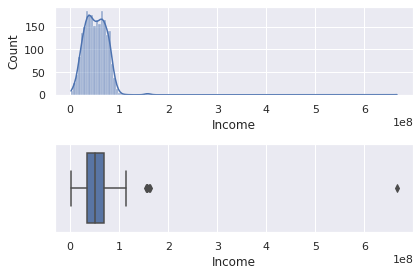

skewtest: SkewtestResult(statistic=nan, pvalue=nan)
skw: nan
count    2.216000e+03
mean     5.224725e+07
std      2.517308e+07
min      1.730000e+06
25%      3.530300e+07
50%      5.138150e+07
75%      6.852200e+07
max      6.666660e+08
Name: Income, dtype: float64
Nilai max di luar outlier = nan
Nilai min di luar outlier = nan
Jumlah outlier = 0
Outlier = []
----------------------------------------------------------------------------------------------------
4. Kidhome


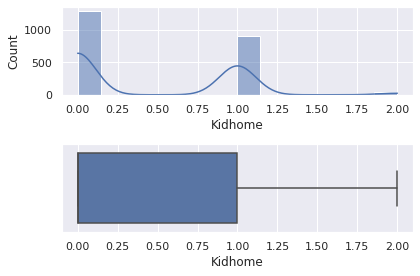

skewtest: SkewtestResult(statistic=11.326048864734062, pvalue=9.750471205094135e-30)
skw: 0.6348629678489649
count    2240.000000
mean        0.444196
std         0.538398
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: Kidhome, dtype: float64
Nilai max di luar outlier = 0
Nilai min di luar outlier = 0
Jumlah outlier = 947
Outlier = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

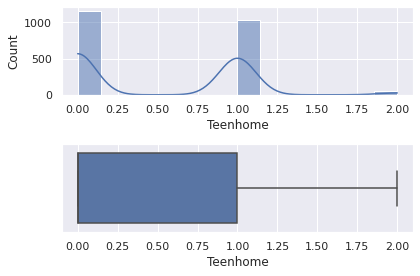

skewtest: SkewtestResult(statistic=7.595185219220309, pvalue=3.073524949907878e-14)
skw: 0.4068422055022791
count    2240.000000
mean        0.506250
std         0.544538
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: Teenhome, dtype: float64
Nilai max di luar outlier = 0
Nilai min di luar outlier = 0
Jumlah outlier = 1082
Outlier = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 

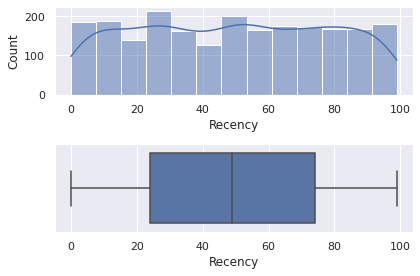

skewtest: SkewtestResult(statistic=-0.03848756042808175, pvalue=0.9692989494768486)
skw: -0.001985328034291316
count    2240.000000
mean       49.109375
std        28.962453
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64
Nilai max di luar outlier = 60
Nilai min di luar outlier = 0
Jumlah outlier = 862
Outlier = [94, 68, 82, 91, 86, 63, 69, 89, 96, 76, 99, 88, 80, 72, 92, 96, 63, 75, 90, 88, 68, 87, 87, 95, 70, 79, 87, 69, 84, 72, 68, 94, 95, 74, 85, 65, 63, 83, 69, 87, 72, 96, 61, 74, 73, 94, 65, 96, 64, 91, 98, 83, 63, 84, 78, 77, 79, 90, 96, 81, 77, 80, 63, 98, 99, 93, 80, 82, 81, 63, 72, 88, 99, 70, 66, 79, 81, 93, 84, 72, 66, 65, 89, 98, 97, 75, 74, 90, 92, 77, 97, 95, 85, 70, 86, 64, 84, 74, 75, 88, 62, 74, 76, 62, 89, 68, 64, 85, 93, 86, 69, 86, 67, 81, 78, 79, 82, 95, 65, 71, 65, 90, 95, 93, 61, 65, 87, 67, 65, 64, 82, 63, 66, 69, 86, 92, 74, 94, 78, 66, 86, 80, 71, 71, 80, 83, 76, 90, 83, 73

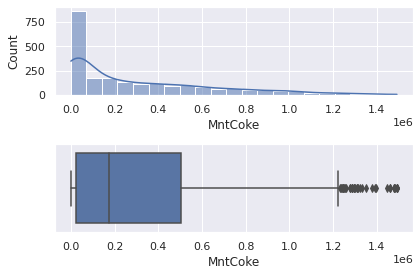

skewtest: SkewtestResult(statistic=18.39553155363088, pvalue=1.4265496058956685e-75)
skw: 1.1749830708938136
count    2.240000e+03
mean     3.039357e+05
std      3.365974e+05
min      0.000000e+00
25%      2.375000e+04
50%      1.735000e+05
75%      5.042500e+05
max      1.493000e+06
Name: MntCoke, dtype: float64
Nilai max di luar outlier = 59000
Nilai min di luar outlier = 0
Jumlah outlier = 1428
Outlier = [635000, 426000, 173000, 520000, 235000, 76000, 194000, 233000, 1006000, 84000, 1012000, 86000, 867000, 384000, 270000, 173000, 684000, 112000, 110000, 96000, 482000, 702000, 437000, 421000, 81000, 123000, 826000, 245000, 650000, 510000, 328000, 984000, 295000, 447000, 712000, 452000, 523000, 546000, 398000, 688000, 247000, 856000, 496000, 258000, 565000, 721000, 1032000, 577000, 64000, 112000, 163000, 130000, 292000, 350000, 135000, 230000, 445000, 505000, 207000, 135000, 386000, 562000, 217000, 144000, 295000, 76000, 454000, 425000, 1332000, 527000, 490000, 378000, 64000, 547000, 

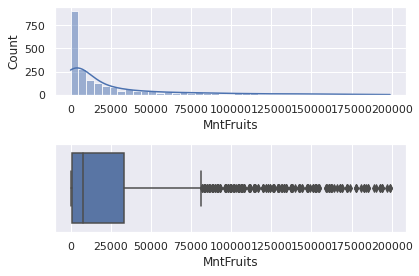

skewtest: SkewtestResult(statistic=26.554617553306645, pvalue=2.2714640032059337e-155)
skw: 2.1006554110275215
count      2240.000000
mean      26302.232143
std       39773.433765
min           0.000000
25%        1000.000000
50%        8000.000000
75%       33000.000000
max      199000.000000
Name: MntFruits, dtype: float64
Nilai max di luar outlier = 2000
Nilai min di luar outlier = 0
Jumlah outlier = 1558
Outlier = [88000, 49000, 4000, 43000, 42000, 65000, 10000, 5000, 16000, 61000, 14000, 22000, 5000, 5000, 80000, 17000, 3000, 4000, 4000, 100000, 4000, 17000, 12000, 34000, 17000, 3000, 8000, 76000, 11000, 164000, 18000, 6000, 5000, 50000, 19000, 37000, 6000, 120000, 9000, 51000, 35000, 3000, 26000, 18000, 7000, 40000, 3000, 14000, 49000, 59000, 36000, 3000, 107000, 6000, 10000, 111000, 105000, 4000, 5000, 17000, 23000, 8000, 6000, 60000, 9000, 42000, 37000, 3000, 26000, 46000, 172000, 81000, 76000, 3000, 106000, 3000, 194000, 115000, 17000, 44000, 99000, 90000, 5000, 6000, 48000, 3

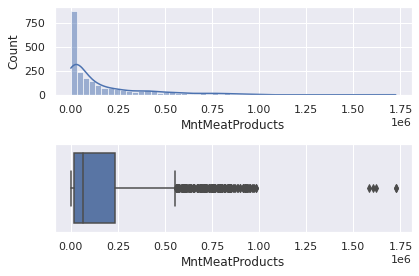

skewtest: SkewtestResult(statistic=26.42136396600801, pvalue=7.787156260411321e-154)
skw: 2.0818378311977765
count    2.240000e+03
mean     1.669500e+05
std      2.257154e+05
min      0.000000e+00
25%      1.600000e+04
50%      6.700000e+04
75%      2.320000e+05
max      1.725000e+06
Name: MntMeatProducts, dtype: float64
Nilai max di luar outlier = 40000
Nilai min di luar outlier = 0
Jumlah outlier = 1306
Outlier = [546000, 127000, 118000, 98000, 164000, 56000, 480000, 53000, 115000, 498000, 73000, 1725000, 86000, 102000, 42000, 801000, 44000, 96000, 471000, 151000, 206000, 536000, 50000, 266000, 48000, 317000, 125000, 780000, 550000, 124000, 432000, 482000, 538000, 102000, 134000, 48000, 367000, 309000, 159000, 487000, 460000, 43000, 291000, 65000, 925000, 779000, 64000, 68000, 44000, 424000, 568000, 192000, 359000, 447000, 92000, 183000, 276000, 690000, 271000, 106000, 292000, 311000, 125000, 101000, 812000, 94000, 133000, 102000, 124000, 951000, 110000, 73000, 47000, 189000, 196000,

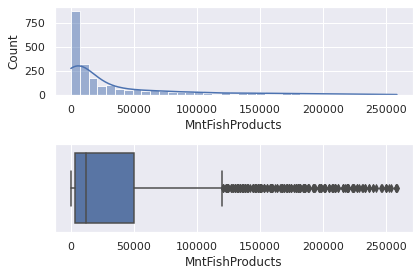

skewtest: SkewtestResult(statistic=25.218920379165414, pvalue=2.4842936928162727e-140)
skw: 1.918483171887136
count      2240.000000
mean      37525.446429
std       54628.979403
min           0.000000
25%        3000.000000
50%       12000.000000
75%       50000.000000
max      259000.000000
Name: MntFishProducts, dtype: float64
Nilai max di luar outlier = 7000
Nilai min di luar outlier = 0
Jumlah outlier = 1303
Outlier = [172000, 111000, 10000, 46000, 50000, 11000, 225000, 59000, 150000, 30000, 69000, 21000, 39000, 15000, 20000, 21000, 34000, 33000, 119000, 15000, 160000, 82000, 227000, 15000, 50000, 37000, 27000, 30000, 156000, 12000, 180000, 121000, 69000, 16000, 37000, 119000, 201000, 58000, 189000, 17000, 84000, 97000, 137000, 34000, 27000, 10000, 110000, 49000, 98000, 12000, 75000, 65000, 185000, 80000, 50000, 10000, 75000, 31000, 23000, 23000, 29000, 151000, 123000, 11000, 39000, 44000, 40000, 173000, 10000, 16000, 65000, 23000, 38000, 38000, 10000, 52000, 13000, 36000, 43000, 

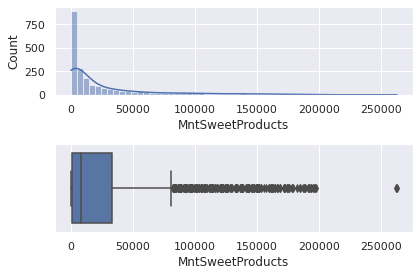

skewtest: SkewtestResult(statistic=26.792739619621823, pvalue=3.9262548548415535e-158)
skw: 2.134650034806875
count      2240.000000
mean      27062.946429
std       41280.498488
min           0.000000
25%        1000.000000
50%        8000.000000
75%       33000.000000
max      263000.000000
Name: MntSweetProducts, dtype: float64
Nilai max di luar outlier = 2000
Nilai min di luar outlier = 0
Jumlah outlier = 1532
Outlier = [88000, 21000, 3000, 27000, 42000, 49000, 3000, 112000, 5000, 68000, 13000, 12000, 16000, 24000, 38000, 32000, 6000, 12000, 6000, 263000, 21000, 66000, 22000, 22000, 68000, 8000, 7000, 49000, 178000, 30000, 22000, 5000, 10000, 38000, 67000, 167000, 40000, 24000, 120000, 120000, 13000, 18000, 14000, 6000, 122000, 6000, 24000, 82000, 29000, 60000, 4000, 37000, 6000, 15000, 18000, 105000, 3000, 5000, 22000, 65000, 4000, 3000, 133000, 37000, 28000, 5000, 61000, 132000, 40000, 26000, 98000, 4000, 22000, 35000, 51000, 20000, 82000, 103000, 9000, 5000, 72000, 4000, 4000, 3

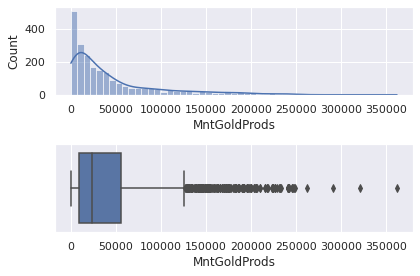

skewtest: SkewtestResult(statistic=24.96052968467289, pvalue=1.641238072316752e-137)
skw: 1.8848423570307622
count      2240.000000
mean      44021.875000
std       52167.438915
min           0.000000
25%        9000.000000
50%       24000.000000
75%       56000.000000
max      362000.000000
Name: MntGoldProds, dtype: float64
Nilai max di luar outlier = 22000
Nilai min di luar outlier = 0
Jumlah outlier = 1162
Outlier = [88000, 42000, 27000, 23000, 30000, 45000, 28000, 176000, 39000, 48000, 99000, 41000, 362000, 89000, 43000, 35000, 36000, 42000, 102000, 39000, 174000, 50000, 38000, 32000, 241000, 109000, 190000, 40000, 43000, 80000, 169000, 30000, 38000, 109000, 73000, 86000, 51000, 51000, 23000, 89000, 76000, 34000, 145000, 53000, 75000, 223000, 111000, 81000, 38000, 65000, 27000, 43000, 79000, 86000, 60000, 72000, 27000, 33000, 120000, 30000, 48000, 168000, 172000, 216000, 58000, 41000, 130000, 124000, 23000, 50000, 126000, 33000, 116000, 49000, 32000, 91000, 76000, 42000, 57000, 33

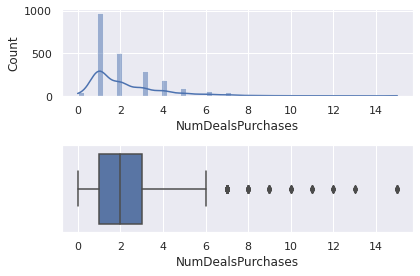

skewtest: SkewtestResult(statistic=28.650794444422008, pvalue=1.5669303766093428e-180)
skw: 2.416949508619042
count    2240.000000
mean        2.325000
std         1.932238
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        15.000000
Name: NumDealsPurchases, dtype: float64
Nilai max di luar outlier = 2
Nilai min di luar outlier = 0
Jumlah outlier = 727
Outlier = [3, 5, 4, 3, 3, 15, 3, 3, 7, 4, 6, 5, 3, 3, 3, 3, 9, 7, 3, 4, 4, 7, 3, 3, 4, 5, 4, 3, 5, 4, 12, 3, 5, 4, 4, 3, 5, 5, 4, 3, 3, 4, 5, 5, 5, 3, 3, 3, 3, 7, 4, 4, 4, 3, 4, 15, 3, 3, 3, 4, 6, 3, 3, 6, 5, 5, 8, 10, 6, 4, 5, 4, 3, 9, 3, 4, 7, 4, 5, 3, 4, 4, 3, 4, 6, 4, 4, 3, 4, 3, 3, 13, 3, 3, 3, 3, 5, 4, 3, 3, 4, 6, 6, 3, 5, 6, 3, 4, 3, 3, 4, 3, 5, 3, 3, 7, 6, 4, 3, 4, 3, 7, 3, 3, 4, 3, 3, 4, 4, 4, 5, 9, 3, 3, 3, 4, 3, 3, 3, 9, 5, 15, 3, 3, 5, 3, 3, 7, 4, 4, 3, 3, 4, 7, 4, 4, 7, 4, 4, 3, 3, 6, 3, 3, 4, 4, 3, 6, 4, 7, 4, 3, 3, 4, 6, 5, 3, 4, 5, 3, 3, 3, 4, 6, 5, 7, 4, 3, 3, 3, 3, 3, 3, 4, 4,

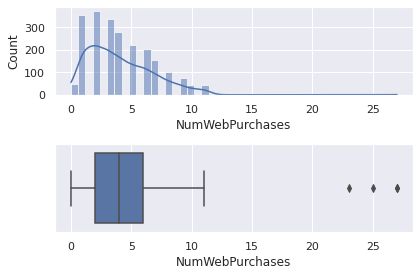

skewtest: SkewtestResult(statistic=20.563877755860283, pvalue=5.782211514190548e-94)
skw: 1.3818681457832678
count    2240.000000
mean        4.084821
std         2.778714
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        27.000000
Name: NumWebPurchases, dtype: float64
Nilai max di luar outlier = 5
Nilai min di luar outlier = 0
Jumlah outlier = 628
Outlier = [8, 8, 6, 7, 6, 7, 11, 6, 7, 27, 6, 7, 8, 6, 8, 8, 7, 7, 11, 10, 9, 7, 10, 6, 7, 7, 9, 6, 6, 6, 7, 8, 6, 6, 9, 6, 6, 6, 6, 11, 7, 6, 8, 8, 7, 8, 10, 6, 10, 6, 11, 9, 6, 7, 8, 7, 8, 11, 7, 11, 7, 8, 8, 11, 6, 9, 8, 6, 7, 6, 6, 11, 9, 9, 6, 8, 10, 6, 7, 9, 8, 6, 6, 7, 8, 9, 6, 8, 6, 6, 10, 8, 9, 11, 7, 6, 8, 11, 6, 6, 6, 7, 9, 6, 7, 11, 7, 10, 7, 6, 8, 9, 8, 6, 9, 8, 9, 7, 7, 7, 6, 8, 8, 7, 6, 7, 6, 7, 6, 9, 6, 10, 6, 6, 6, 6, 8, 6, 8, 7, 6, 6, 6, 8, 6, 6, 7, 7, 6, 6, 6, 6, 6, 8, 11, 7, 6, 6, 9, 8, 6, 9, 9, 7, 7, 9, 7, 9, 7, 6, 7, 6, 10, 8, 11, 8, 8, 10, 9, 8, 8, 9, 7, 11, 11, 6, 6, 11, 7,

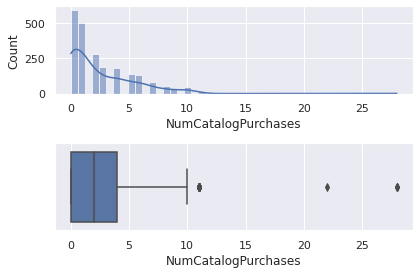

skewtest: SkewtestResult(statistic=24.92091492149917, pvalue=4.415208142090322e-137)
skw: 1.879728952699662
count    2240.000000
mean        2.662054
std         2.923101
min         0.000000
25%         0.000000
50%         2.000000
75%         4.000000
max        28.000000
Name: NumCatalogPurchases, dtype: float64
Nilai max di luar outlier = 0
Nilai min di luar outlier = 0
Jumlah outlier = 1654
Outlier = [10, 1, 2, 3, 4, 3, 4, 1, 6, 1, 4, 1, 2, 28, 3, 2, 1, 1, 1, 1, 9, 5, 1, 1, 5, 6, 1, 1, 10, 6, 3, 4, 1, 1, 2, 2, 9, 9, 2, 10, 5, 2, 6, 2, 2, 3, 4, 1, 10, 2, 5, 8, 3, 2, 1, 6, 8, 1, 1, 5, 10, 1, 1, 6, 2, 2, 4, 1, 4, 7, 2, 5, 3, 11, 1, 4, 1, 4, 6, 4, 1, 7, 4, 1, 6, 1, 1, 2, 1, 8, 4, 6, 1, 3, 4, 1, 2, 5, 1, 5, 2, 1, 4, 5, 7, 5, 2, 3, 1, 1, 4, 1, 1, 5, 4, 1, 1, 4, 6, 4, 22, 7, 2, 4, 1, 1, 1, 2, 8, 10, 7, 1, 1, 4, 1, 1, 1, 10, 1, 7, 1, 1, 1, 3, 6, 6, 1, 1, 4, 6, 9, 1, 2, 4, 1, 6, 1, 1, 4, 1, 10, 1, 4, 1, 5, 3, 1, 6, 1, 2, 2, 5, 1, 3, 8, 2, 1, 5, 4, 9, 5, 3, 4, 10, 6, 9, 1, 6, 3, 2, 1, 2, 1

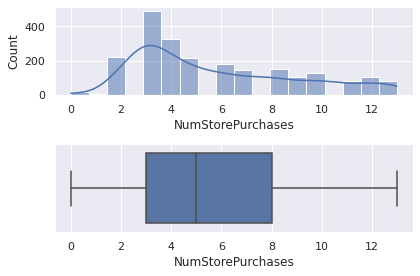

skewtest: SkewtestResult(statistic=12.331752366600123, pvalue=6.11032633842305e-35)
skw: 0.701766949843736
count    2240.000000
mean        5.790179
std         3.250958
min         0.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        13.000000
Name: NumStorePurchases, dtype: float64
Nilai max di luar outlier = 7
Nilai min di luar outlier = 0
Jumlah outlier = 649
Outlier = [10, 10, 8, 12, 9, 9, 9, 10, 9, 12, 9, 12, 10, 13, 10, 13, 10, 11, 12, 10, 8, 10, 10, 13, 8, 9, 8, 13, 8, 8, 12, 11, 12, 11, 8, 11, 10, 13, 10, 9, 13, 12, 10, 9, 11, 10, 9, 10, 8, 12, 13, 8, 9, 12, 12, 9, 9, 10, 9, 9, 8, 9, 11, 11, 12, 11, 8, 8, 11, 11, 10, 9, 8, 13, 11, 10, 8, 12, 10, 8, 9, 8, 13, 12, 9, 11, 12, 9, 9, 10, 12, 10, 10, 12, 8, 12, 8, 11, 11, 8, 9, 8, 10, 8, 10, 10, 9, 11, 8, 8, 12, 10, 13, 12, 8, 12, 10, 9, 8, 12, 8, 10, 11, 9, 8, 8, 13, 10, 12, 9, 9, 13, 12, 9, 11, 8, 10, 9, 8, 8, 11, 8, 9, 8, 12, 13, 9, 11, 8, 13, 10, 12, 13, 11, 11, 13, 12, 12, 8, 11, 12, 12, 9, 10, 9, 

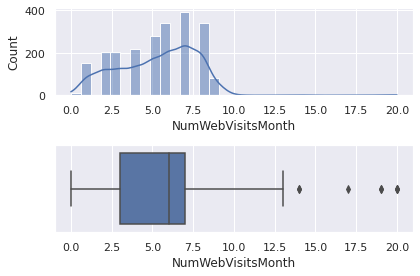

skewtest: SkewtestResult(statistic=3.986298714911147, pvalue=6.711201077210989e-05)
skw: 0.2077862949945858
count    2240.000000
mean        5.316518
std         2.426645
min         0.000000
25%         3.000000
50%         6.000000
75%         7.000000
max        20.000000
Name: NumWebVisitsMonth, dtype: float64
Nilai max di luar outlier = 7
Nilai min di luar outlier = 0
Jumlah outlier = 437
Outlier = [8, 9, 20, 8, 8, 8, 8, 8, 8, 8, 9, 10, 8, 8, 8, 8, 9, 8, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 8, 8, 8, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 8, 8, 8, 9, 8, 8, 8, 9, 8, 8, 8, 9, 8, 8, 8, 8, 8, 8, 8, 8, 9, 8, 8, 8, 8, 8, 9, 8, 8, 8, 8, 8, 8, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 8, 8, 9, 9, 8, 9, 8, 8, 8, 8, 8, 8, 9, 8, 8, 8, 8, 8, 9, 8, 8, 8, 8, 8, 8, 20, 8, 9, 8, 8, 8, 8, 8, 9, 8, 8, 8, 8, 8, 9, 8, 8, 8, 8, 8, 9, 8, 8, 9, 8, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 8, 14, 9, 8, 8, 8, 8, 9, 8, 8, 8, 8, 9,

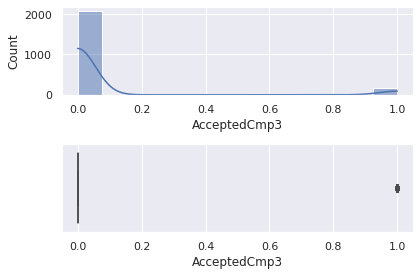

skewtest: SkewtestResult(statistic=33.356219728196926, pvalue=5.918796010460662e-244)
skw: 3.289499941208564
count    2240.000000
mean        0.072768
std         0.259813
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: AcceptedCmp3, dtype: float64
Nilai max di luar outlier = 0
Nilai min di luar outlier = 0
Jumlah outlier = 163
Outlier = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
----------------------------------------------------------------------------------------------------
19. Ac

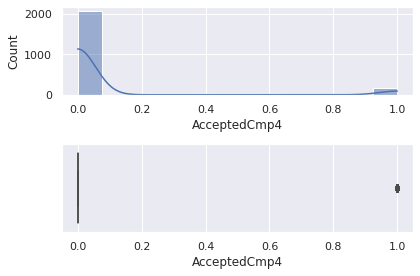

skewtest: SkewtestResult(statistic=33.11945471415765, pvalue=1.5596481109139155e-240)
skw: 3.2394032209944275
count    2240.000000
mean        0.074554
std         0.262728
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: AcceptedCmp4, dtype: float64
Nilai max di luar outlier = 0
Nilai min di luar outlier = 0
Jumlah outlier = 167
Outlier = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
----------------------------------------------------------------------------------------------

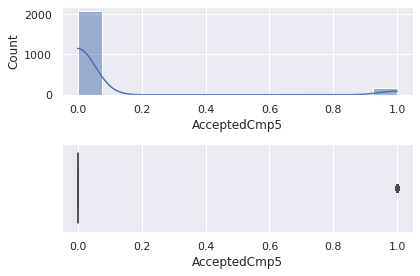

skewtest: SkewtestResult(statistic=33.35621972819693, pvalue=5.918796010459986e-244)
skw: 3.2894999412085646
count    2240.000000
mean        0.072768
std         0.259813
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: AcceptedCmp5, dtype: float64
Nilai max di luar outlier = 0
Nilai min di luar outlier = 0
Jumlah outlier = 163
Outlier = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
----------------------------------------------------------------------------------------------------
21. Ac

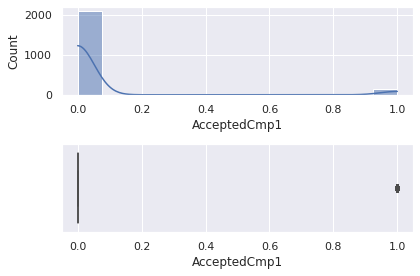

skewtest: SkewtestResult(statistic=34.548430152473145, pvalue=1.5048703498680036e-261)
skw: 3.5530631637548877
count    2240.000000
mean        0.064286
std         0.245316
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: AcceptedCmp1, dtype: float64
Nilai max di luar outlier = 0
Nilai min di luar outlier = 0
Jumlah outlier = 144
Outlier = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
----------------------------------------------------------------------------------------------------
22. AcceptedCmp2


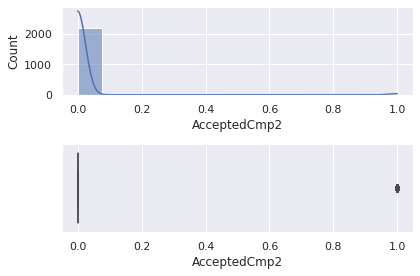

skewtest: SkewtestResult(statistic=48.19054555727846, pvalue=0.0)
skw: 8.466418447448731
count    2240.000000
mean        0.013393
std         0.114976
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: AcceptedCmp2, dtype: float64
Nilai max di luar outlier = 0
Nilai min di luar outlier = 0
Jumlah outlier = 30
Outlier = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
----------------------------------------------------------------------------------------------------
23. Complain


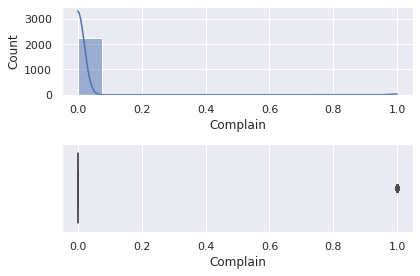

skewtest: SkewtestResult(statistic=51.11456563845436, pvalue=0.0)
skw: 10.18214763147069
count    2240.000000
mean        0.009375
std         0.096391
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Complain, dtype: float64
Nilai max di luar outlier = 0
Nilai min di luar outlier = 0
Jumlah outlier = 21
Outlier = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
----------------------------------------------------------------------------------------------------
24. Z_CostContact


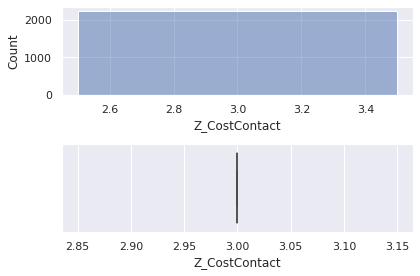

skewtest: SkewtestResult(statistic=1.0013177026829265, pvalue=0.3166732370605506)
skw: 0.0
count    2240.0
mean        3.0
std         0.0
min         3.0
25%         3.0
50%         3.0
75%         3.0
max         3.0
Name: Z_CostContact, dtype: float64
Nilai max di luar outlier = 3
Nilai min di luar outlier = 3
Jumlah outlier = 0
Outlier = []
----------------------------------------------------------------------------------------------------
25. Z_Revenue


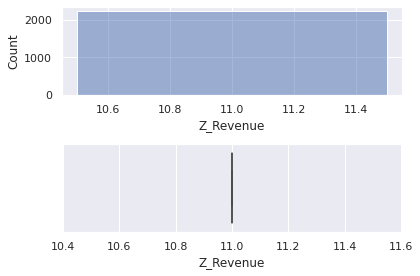

skewtest: SkewtestResult(statistic=1.0013177026829265, pvalue=0.3166732370605506)
skw: 0.0
count    2240.0
mean       11.0
std         0.0
min        11.0
25%        11.0
50%        11.0
75%        11.0
max        11.0
Name: Z_Revenue, dtype: float64
Nilai max di luar outlier = 11
Nilai min di luar outlier = 11
Jumlah outlier = 0
Outlier = []
----------------------------------------------------------------------------------------------------
26. Response


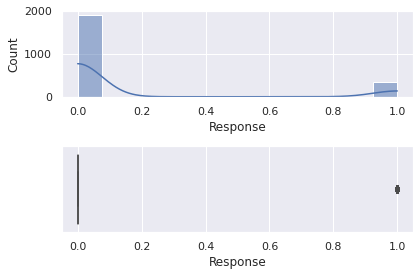

skewtest: SkewtestResult(statistic=25.60902570787378, pvalue=1.2103375588385533e-144)
skw: 1.9702342304620928
count    2240.000000
mean        0.149107
std         0.356274
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Response, dtype: float64
Nilai max di luar outlier = 0
Nilai min di luar outlier = 0
Jumlah outlier = 334
Outlier = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
a = 1
for x in data_num.columns:
  print("{}. {}".format(a, x))
  fig, axes = plt.subplots(2, 1)
  sns.histplot(data_num[x], kde= True, ax= axes[0])
  sns.boxplot(data = data_num, x= x, ax= axes[1])

  plt.tight_layout()
  plt.show()

  print('skewtest: {}'.format(skewtest(data_num[x])))
  print('skw: {}'.format(skew(data_num[x])))
  print(data_num[x].describe())

  q1 = np.percentile(data_num[x], 25)
  q3 = np.percentile(data_num[x], 75)
  iqr = q3 = q1
  upper_fence = q3 + 1.5*iqr
  lower_fence = q1 - 1.5*iqr 

  outlier = list(data_num[(data_num[x] < lower_fence) | (data_num[x] > upper_fence)][x])
  upper_whisker = np.max(data_num[data_num[x] <= upper_fence][x])
  lower_whisker = np.min(data_num[data_num[x] >= lower_fence][x])

  print("Nilai max di luar outlier = {}".format(upper_whisker))
  print("Nilai min di luar outlier = {}".format(lower_whisker))
  print("Jumlah outlier = {}".format(len(outlier)))
  print('Outlier = {}'.format(outlier))
  a += 1
  print("-"*100)

Column with the biggest number of outlier is `MntFruits` 1654

**Univariat Categoric**

1. Education


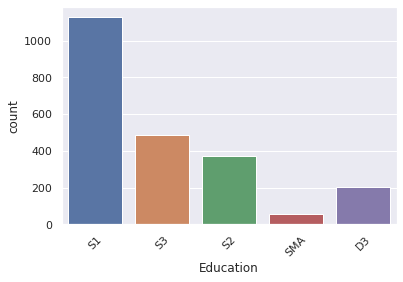

Unique catgeories counts : 5
Unique categoris : ['S1' 'S3' 'S2' 'SMA' 'D3']
Unique value counts : {}
S1     1127
S3      486
S2      370
D3      203
SMA      54
Name: Education, dtype: int64
----------------------------------------------------------------------------------------------------
1. Marital_Status


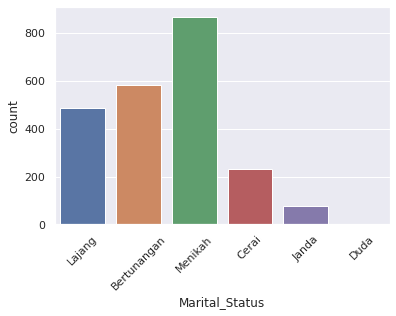

Unique catgeories counts : 6
Unique categoris : ['Lajang' 'Bertunangan' 'Menikah' 'Cerai' 'Janda' 'Duda']
Unique value counts : {}
Menikah        864
Bertunangan    580
Lajang         484
Cerai          232
Janda           77
Duda             3
Name: Marital_Status, dtype: int64
----------------------------------------------------------------------------------------------------
1. Dt_Customer


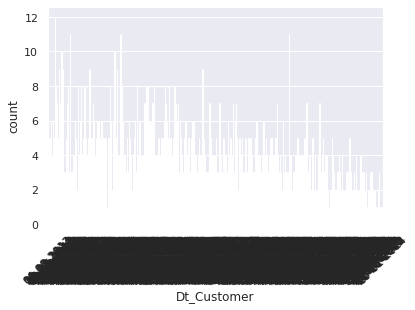

Unique catgeories counts : 663
Unique categoris : ['04-09-2012' '08-03-2014' '21-08-2013' '10-02-2014' '19-01-2014'
 '09-09-2013' '13-11-2012' '08-05-2013' '06-06-2013' '13-03-2014'
 '15-11-2013' '10-10-2012' '24-11-2012' '24-12-2012' '31-08-2012'
 '28-03-2013' '03-11-2012' '08-08-2012' '06-01-2013' '23-12-2012'
 '11-01-2014' '18-03-2013' '02-01-2013' '27-05-2013' '20-02-2013'
 '31-05-2013' '22-11-2013' '22-05-2014' '11-05-2013' '29-10-2012'
 '29-08-2013' '31-12-2013' '02-09-2013' '11-02-2014' '01-02-2013'
 '29-04-2013' '12-03-2013' '05-11-2013' '02-10-2013' '28-06-2014'
 '09-11-2012' '24-05-2013' '01-01-2014' '08-11-2012' '12-05-2014'
 '11-08-2012' '07-06-2014' '12-06-2013' '19-11-2012' '02-04-2013'
 '28-04-2014' '17-06-2013' '03-03-2014' '04-07-2013' '07-09-2012'
 '18-02-2013' '11-06-2013' '06-12-2013' '21-05-2013' '11-05-2014'
 '19-03-2014' '27-09-2013' '08-04-2013' '11-09-2012' '14-09-2012'
 '17-03-2013' '05-04-2013' '30-04-2014' '19-12-2012' '27-08-2012'
 '12-10-2012' '04-09-2013'

In [ ]:
a = 1
for x in data_cat.columns:
  print('{}. {}'.format(a, x))
  sns.countplot(data = data_cat, x= x)
  plt.xticks(rotation = 45)
  plt.show()
  print("Unique catgeories counts : {}".format(len(data_cat[x].unique())))
  print("Unique categoris : {}".format(data_cat[x].unique()))
  print("Unique value counts : {}")
  print(data_cat[x].value_counts())
  print("-"*100)

  a +1

1. `Dt Customer` data type change to datetime 

2. Janda and duda value in `Marital_Status` change to Cerai 


In [ ]:
corr = data_num.corr(method= 'spearman')

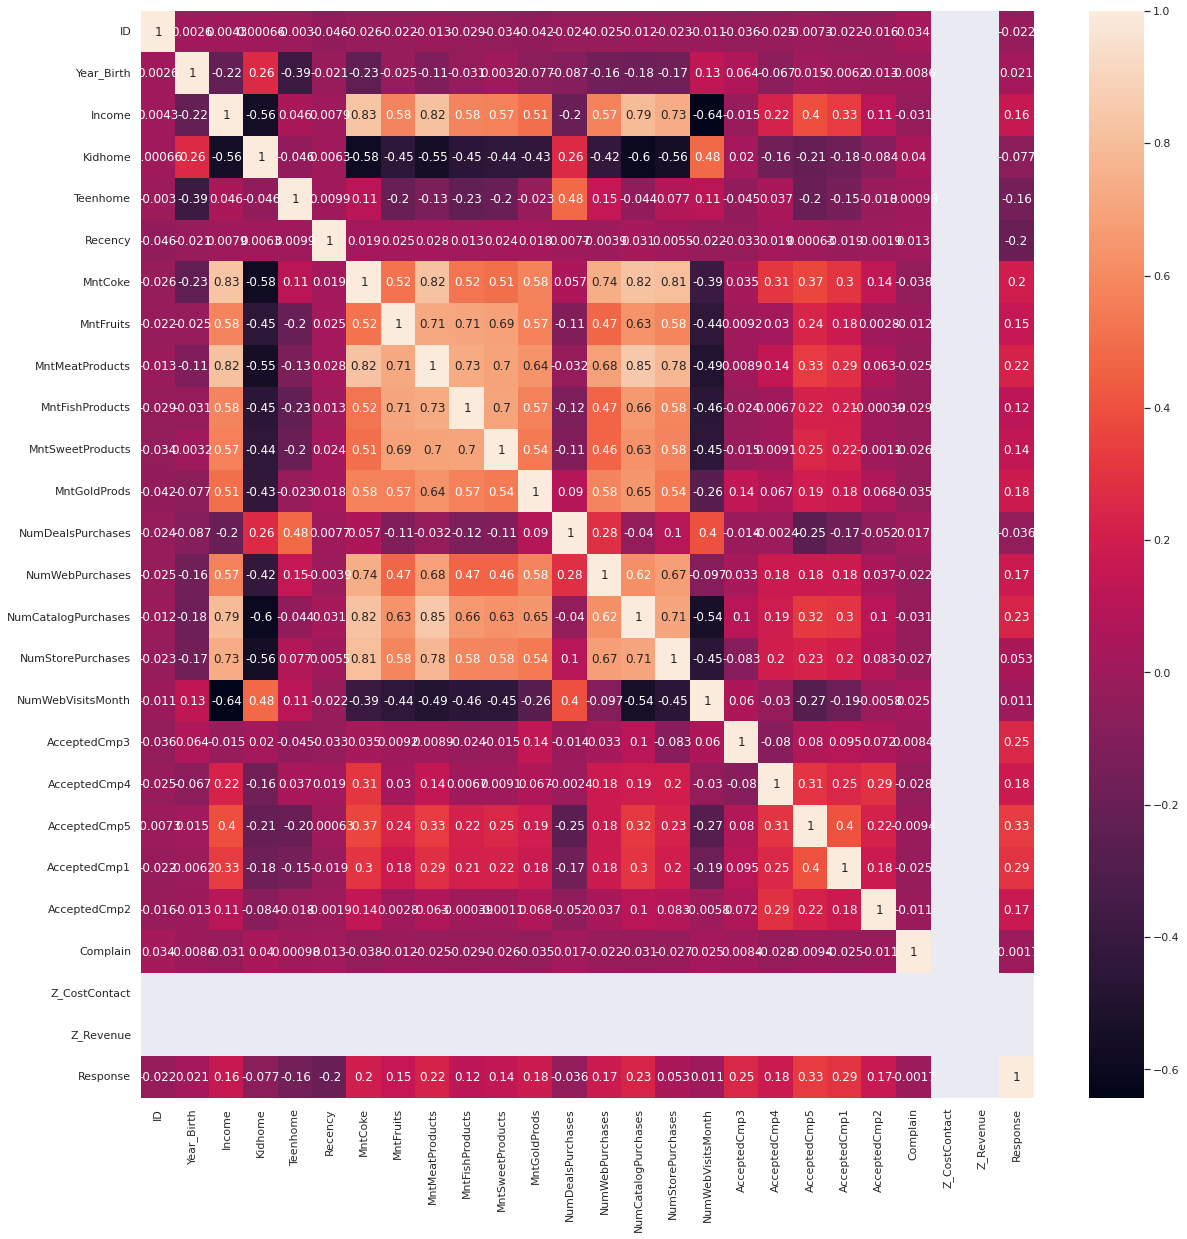

In [ ]:
plt.figure(figsize = (20, 20))
sns.set(font_scale = 1)
sns.heatmap(corr, annot= True)

In [ ]:
threshold = 0.7
couple = []
for col in corr.columns:
  for idx in corr.index: 
    if col != idx:
      if [col, idx] not in couple: 
        couple.append([idx, col])
        if np.abs(corr.loc[idx, col]) > threshold:
          print("Correlation between {} and {} is {}".format(idx, col, corr.loc[idx, col]))

Correlation between MntCoke and Income is 0.830056050542334
Correlation between MntMeatProducts and Income is 0.8168150203811545
Correlation between NumCatalogPurchases and Income is 0.7918406763718138
Correlation between NumStorePurchases and Income is 0.7317522657608556
Correlation between MntMeatProducts and MntCoke is 0.8236521541141395
Correlation between NumWebPurchases and MntCoke is 0.74019511433521
Correlation between NumCatalogPurchases and MntCoke is 0.8234208892802969
Correlation between NumStorePurchases and MntCoke is 0.8069178612408089
Correlation between MntMeatProducts and MntFruits is 0.7131685597805494
Correlation between MntFishProducts and MntFruits is 0.7050161898585481
Correlation between MntFishProducts and MntMeatProducts is 0.7262415247350231
Correlation between NumCatalogPurchases and MntMeatProducts is 0.8516600511783947
Correlation between NumStorePurchases and MntMeatProducts is 0.7793355920302663
Correlation between MntSweetProducts and MntFishProducts is

# DATA PREPARATION

In [ ]:
# drop label 
data = dataset.copy().drop("Response", axis =1)
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue
0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11
1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11
2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11
3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11
4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11


In [ ]:
# change DT_Customer to datetime 
data['Dt_Customer'] = data["Dt_Customer"].apply(pd.to_datetime)
# change janda and duda with cerai 
data['Marital_Status'] = data['Marital_Status'].apply(lambda x: "Cerai" if (x == "Janda") | (x == "Duda") else x)

In [ ]:
# feature extraction 
# total kids (kidhome + teenhome)
data['Total_kids'] = data["Kidhome"] + data["Teenhome"]

In [ ]:
# AcceptedAtCmp (customer accepted at which campaign)
cmpAt = []
for idx in data.index:
  if data.loc[idx, "AcceptedCmp1"] == 1:
    cmpAt.append(1)
  elif data.loc[idx, "AcceptedCmp2"] == 1:
    cmpAt.append(2)
  elif data.loc[idx, "AcceptedCmp3"] == 1:
    cmpAt.append(3)
  elif data.loc[idx, "AcceptedCmp4"] == 1:
    cmpAt.append(4)
  elif data.loc[idx, "AcceptedCmp5"] == 1: 
    cmpAt.append(5)
  else: 
    cmpAt.append(0)

data["CmpAt"] = cmpAt

In [ ]:
# spending (MntCoke + MntFruits	+ MntMeatProducts	+ MntFishProducts	+ MntSweetProducts + MntGoldProds)
data["spending"] = data['MntCoke'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']
# convertion_rate (NumWebPurchases/NumWebVisitsMonth * 100)
data["WEBConvertion_rate%"] = round((data["NumWebPurchases"]/data["NumWebVisitsMonth"] * 100), 2)
# Age 
data["Age"] = date.today().year - data["Year_Birth"]
# Year Join 
data["Year_Join"] = date.today().year - data["Dt_Customer"].dt.year

In [ ]:
# Drop table 
data_drop =  data.drop(["ID", "Kidhome", "Teenhome", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", 
              "MntCoke", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds", "NumWebPurchases", 
              "NumWebVisitsMonth", "Year_Birth", "Z_CostContact", "Z_Revenue", "Dt_Customer"], axis = 1)

In [ ]:
data_drop.head()

,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumCatalogPurchases,NumStorePurchases,Complain,Total_kids,CmpAt,spending,WEBConvertion_rate%,Age,Year_Join
0,S1,Lajang,58138000.0,58,3,10,4,0,0,0,1617000,114.29,65,10
1,S1,Lajang,46344000.0,38,2,1,2,0,2,0,27000,20.00,68,8
2,S1,Bertunangan,71613000.0,26,1,2,10,0,0,0,776000,200.00,57,9
3,S1,Bertunangan,26646000.0,26,2,0,4,0,1,0,53000,33.33,38,8
4,S3,Menikah,58293000.0,94,5,3,6,0,1,0,422000,100.00,41,8


In [ ]:
# remove infinite value 
data_drop["WEBConvertion_rate%"].replace({-np.inf: 0}, inplace = True)
data_drop["WEBConvertion_rate%"].replace({np.inf: 0}, inplace = True)

# FEATURE ENGINEERING

In [ ]:
# impute WEBConvertion_rate% with 0
data_drop["WEBConvertion_rate%"].fillna(0, inplace = True)

In [ ]:
# impute Income with simple imputer = median
imputer = SimpleImputer(strategy = 'mean')
data_drop["Income"] = imputer.fit_transform(data_drop[["Income"]])
data_drop.head()

,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumCatalogPurchases,NumStorePurchases,Complain,Total_kids,CmpAt,spending,WEBConvertion_rate%,Age,Year_Join
0,S1,Lajang,58138000.0,58,3,10,4,0,0,0,1617000,114.29,65,10
1,S1,Lajang,46344000.0,38,2,1,2,0,2,0,27000,20.00,68,8
2,S1,Bertunangan,71613000.0,26,1,2,10,0,0,0,776000,200.00,57,9
3,S1,Bertunangan,26646000.0,26,2,0,4,0,1,0,53000,33.33,38,8
4,S3,Menikah,58293000.0,94,5,3,6,0,1,0,422000,100.00,41,8


In [ ]:
data_drop.isna().sum()/len(data_drop)

Education              0.0
Marital_Status         0.0
Income                 0.0
Recency                0.0
NumDealsPurchases      0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
Complain               0.0
Total_kids             0.0
CmpAt                  0.0
spending               0.0
WEBConvertion_rate%    0.0
Age                    0.0
Year_Join              0.0
dtype: float64

In [ ]:
data_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   object 
 1   Marital_Status       2240 non-null   object 
 2   Income               2240 non-null   float64
 3   Recency              2240 non-null   int64  
 4   NumDealsPurchases    2240 non-null   int64  
 5   NumCatalogPurchases  2240 non-null   int64  
 6   NumStorePurchases    2240 non-null   int64  
 7   Complain             2240 non-null   int64  
 8   Total_kids           2240 non-null   int64  
 9   CmpAt                2240 non-null   int64  
 10  spending             2240 non-null   int64  
 11  WEBConvertion_rate%  2240 non-null   float64
 12  Age                  2240 non-null   int64  
 13  Year_Join            2240 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 245.1+ KB


In [ ]:
data_num = data_drop.select_dtypes("number")
data_cat = data_drop.select_dtypes("object")

In [ ]:
# scaling
rs = RobustScaler()
num_sc = pd.DataFrame(rs.fit_transform(data_num), columns = rs.feature_names_in_)
num_sc.head()

,Income,Recency,NumDealsPurchases,NumCatalogPurchases,NumStorePurchases,Complain,Total_kids,CmpAt,spending,WEBConvertion_rate%,Age,Year_Join
0,0.195307,0.18,0.5,2.00,-0.2,0.0,-1.0,0.0,1.250064,0.336762,0.722222,1.0
1,-0.164804,-0.22,0.0,-0.25,-0.6,0.0,1.0,0.0,-0.377783,-0.471415,0.888889,-1.0
2,0.606745,-0.46,-0.5,0.00,1.0,0.0,-1.0,0.0,0.389045,1.071398,0.277778,0.0
3,-0.766251,-0.46,0.0,-0.50,-0.2,0.0,0.0,0.0,-0.351165,-0.357161,-0.777778,-1.0
4,0.200040,0.90,1.5,0.25,0.2,0.0,0.0,0.0,0.026619,0.214280,-0.611111,-1.0


In [ ]:
ohe = OneHotEncoder(handle_unknown= 'ignore')
cat_enc = pd.DataFrame(ohe.fit_transform(data_cat).toarray(), columns= ohe.get_feature_names_out(data_cat.columns))
cat_enc.head()

,Education_D3,Education_S1,Education_S2,Education_S3,Education_SMA,Marital_Status_Bertunangan,Marital_Status_Cerai,Marital_Status_Lajang,Marital_Status_Menikah
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
data_concat = pd.concat([num_sc, cat_enc], axis= 1)
data_concat.shape

(2240, 21)

# MODELING

In [ ]:
data_concat.head()

,Income,Recency,NumDealsPurchases,NumCatalogPurchases,NumStorePurchases,Complain,Total_kids,CmpAt,spending,WEBConvertion_rate%,Age,Year_Join,Education_D3,Education_S1,Education_S2,Education_S3,Education_SMA,Marital_Status_Bertunangan,Marital_Status_Cerai,Marital_Status_Lajang,Marital_Status_Menikah
0,0.195307,0.18,0.5,2.00,-0.2,0.0,-1.0,0.0,1.250064,0.336762,0.722222,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.164804,-0.22,0.0,-0.25,-0.6,0.0,1.0,0.0,-0.377783,-0.471415,0.888889,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.606745,-0.46,-0.5,0.00,1.0,0.0,-1.0,0.0,0.389045,1.071398,0.277778,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.766251,-0.46,0.0,-0.50,-0.2,0.0,0.0,0.0,-0.351165,-0.357161,-0.777778,-1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.200040,0.90,1.5,0.25,0.2,0.0,0.0,0.0,0.026619,0.214280,-0.611111,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


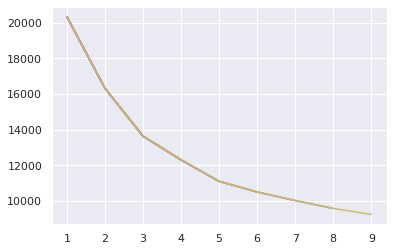

In [ ]:
# elbow method 
wss = []
k = []

for x in np.arange(1, 10, 1):
  k.append(x)
  kmeans = KMeans(n_clusters = x, init= 'k-means++')
  kmeans.fit(data_concat)
  wss.append(kmeans.inertia_)

  sns.lineplot(x = k, y = wss)

choosen k = 3

**PCA**

In [ ]:
# PCA 
pca = PCA(n_components = 3)

In [ ]:
data_pca = pd.DataFrame(pca.fit_transform(data_concat), columns = ['pc1', 'pc2', 'pc3'])
data_pca.head()

,pc1,pc2,pc3
0,0.835129,0.984987,0.746586
1,-1.460549,-0.152568,-0.303769
2,0.855832,1.283019,-0.459490
3,-1.398817,-0.067519,-0.829771
4,-0.538924,0.263223,0.971984


In [ ]:
pca_components = pd.DataFrame(pca.components_).T
pca_components.index = data_concat.columns
pca_components.columns = ['pc1', 'pc2', 'pc3']
pca_components.style.applymap(color)

,pc1,pc2,pc3
Income,0.320892,0.165327,0.153707
Recency,-0.003536,-0.005331,0.008796
NumDealsPurchases,-0.140378,-0.148551,0.854620
NumCatalogPurchases,0.317337,0.141822,0.181721
NumStorePurchases,0.237649,0.126658,0.211856
Complain,-0.002048,0.000159,0.000177
Total_kids,-0.265622,-0.162135,0.281297
CmpAt,0.523267,-0.841411,-0.072983
spending,0.309929,0.100428,0.131556
WEBConvertion_rate%,0.525454,0.410646,0.051570


**MODELING KMEANS WITH PCA**

**PCA**

In [ ]:
kmeans_pca = KMeans(n_clusters = 3)
kmeans_pca.fit(data_pca)

KMeans(n_clusters=3)

In [ ]:
data_drop["label_pca"] = kmeans_pca.labels_
data_drop.head()

,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumCatalogPurchases,NumStorePurchases,Complain,Total_kids,CmpAt,spending,WEBConvertion_rate%,Age,Year_Join,label_pca
0,S1,Lajang,58138000.0,58,3,10,4,0,0,0,1617000,114.29,65,10,2
1,S1,Lajang,46344000.0,38,2,1,2,0,2,0,27000,20.00,68,8,1
2,S1,Bertunangan,71613000.0,26,1,2,10,0,0,0,776000,200.00,57,9,2
3,S1,Bertunangan,26646000.0,26,2,0,4,0,1,0,53000,33.33,38,8,1
4,S3,Menikah,58293000.0,94,5,3,6,0,1,0,422000,100.00,41,8,1


In [ ]:
data_pca['label'] = kmeans_pca.labels_
data_pca.head()

,pc1,pc2,pc3,label
0,0.835129,0.984987,0.746586,2
1,-1.460549,-0.152568,-0.303769,1
2,0.855832,1.283019,-0.459490,2
3,-1.398817,-0.067519,-0.829771,1
4,-0.538924,0.263223,0.971984,1


**WITHOUT PCA**

In [ ]:
kmeans_nopca = KMeans(n_clusters = 3)
kmeans_nopca.fit(data_concat)

KMeans(n_clusters=3)

In [ ]:
data_drop['no_pca'] = kmeans_nopca.labels_
data_drop.head(5)

,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumCatalogPurchases,NumStorePurchases,Complain,Total_kids,CmpAt,spending,WEBConvertion_rate%,Age,Year_Join,label_pca,no_pca
0,S1,Lajang,58138000.0,58,3,10,4,0,0,0,1617000,114.29,65,10,2,0
1,S1,Lajang,46344000.0,38,2,1,2,0,2,0,27000,20.00,68,8,1,1
2,S1,Bertunangan,71613000.0,26,1,2,10,0,0,0,776000,200.00,57,9,2,0
3,S1,Bertunangan,26646000.0,26,2,0,4,0,1,0,53000,33.33,38,8,1,1
4,S3,Menikah,58293000.0,94,5,3,6,0,1,0,422000,100.00,41,8,1,1


# CLUSTERING CONCLUSION

Relationship between pc1 and pc1


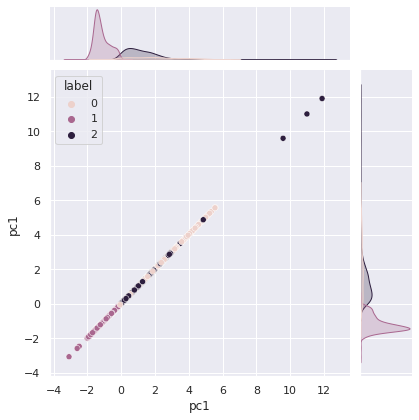


----------------------------------------------------------------------------------------------------
Relationship between pc1 and pc2


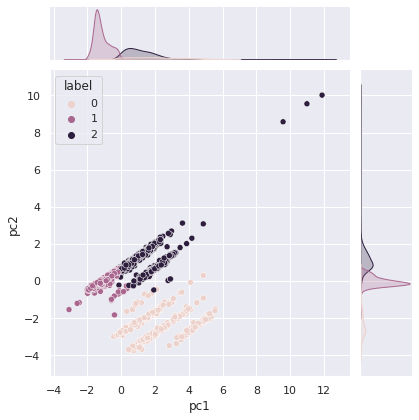


----------------------------------------------------------------------------------------------------
Relationship between pc1 and pc3


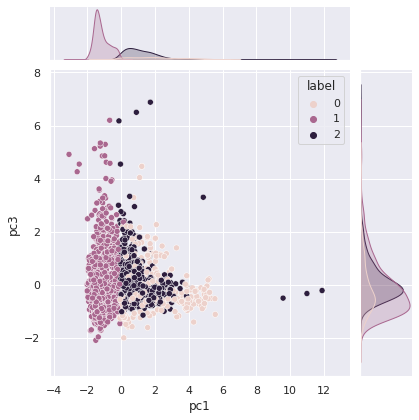


----------------------------------------------------------------------------------------------------
Relationship between pc2 and pc1


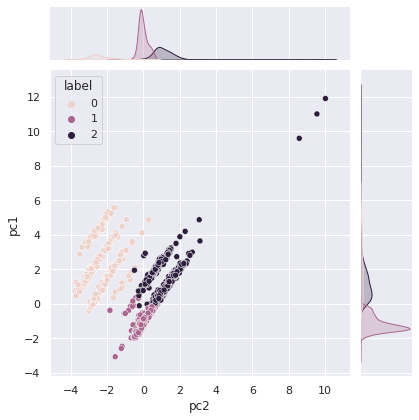


----------------------------------------------------------------------------------------------------
Relationship between pc2 and pc2


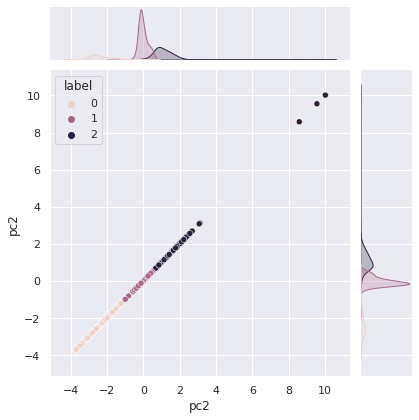


----------------------------------------------------------------------------------------------------
Relationship between pc2 and pc3


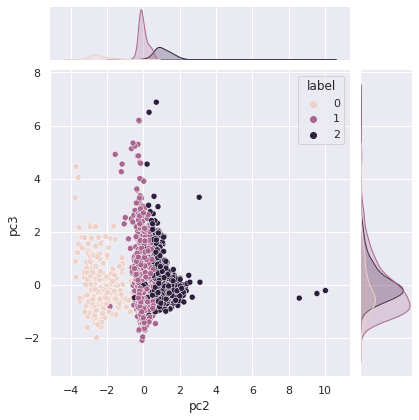


----------------------------------------------------------------------------------------------------
Relationship between pc3 and pc1


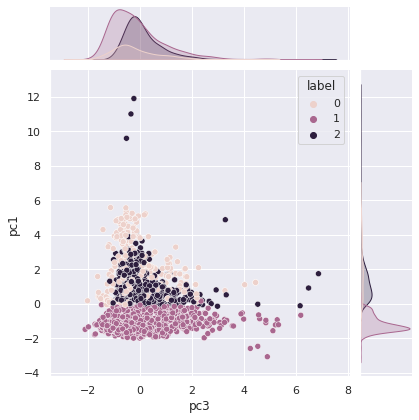


----------------------------------------------------------------------------------------------------
Relationship between pc3 and pc2


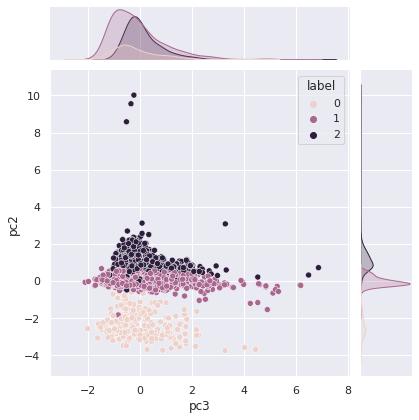


----------------------------------------------------------------------------------------------------
Relationship between pc3 and pc3


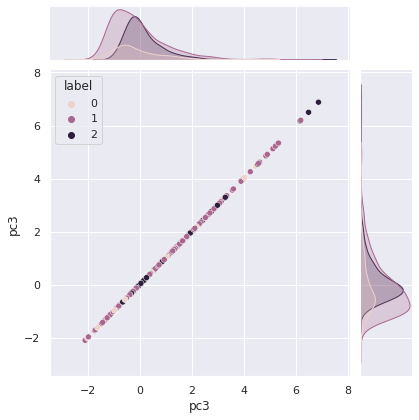


----------------------------------------------------------------------------------------------------


In [ ]:
# clustering with PCA 
for x in data_pca.columns[:3]:
  for y in data_pca.columns[:3]:
    print("Relationship between {} and {}".format(x, y))
    sns.jointplot(data= data_pca, x= x, y= y, hue= 'label')
    plt.show()
    print()
    print("-" * 100)

In [ ]:
clus_num = data_drop.select_dtypes("number").drop(['no_pca', 'label_pca'], axis = 1)

Boxplot untuk kolom Income


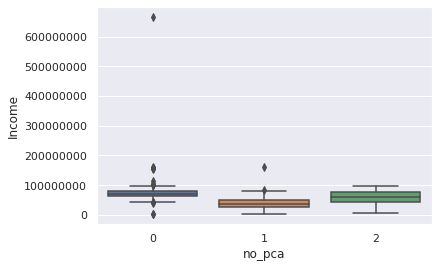

Pointplot untuk kolom Income


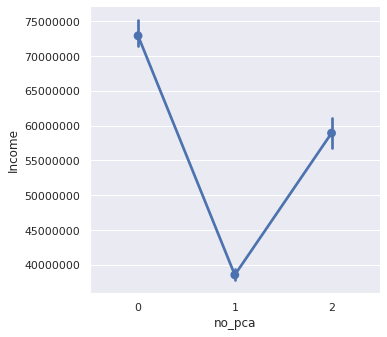

----------------------------------------------------------------------------------------------------
Boxplot untuk kolom Recency


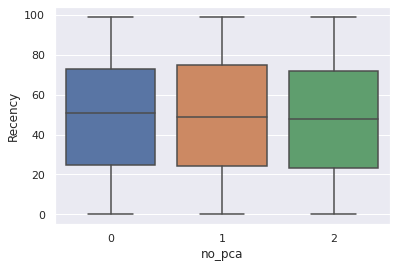

Pointplot untuk kolom Recency


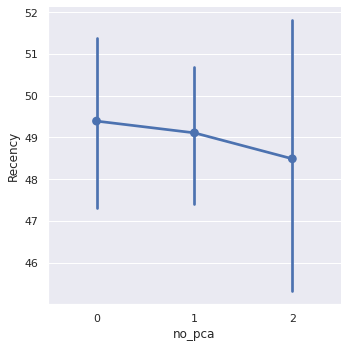

----------------------------------------------------------------------------------------------------
Boxplot untuk kolom NumDealsPurchases


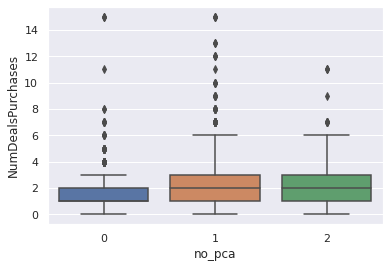

Pointplot untuk kolom NumDealsPurchases


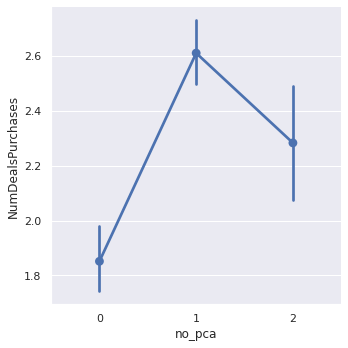

----------------------------------------------------------------------------------------------------
Boxplot untuk kolom NumCatalogPurchases


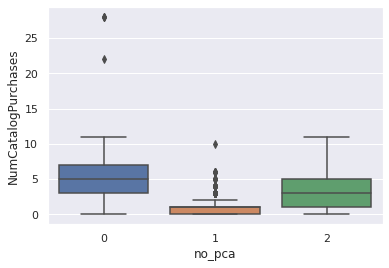

Pointplot untuk kolom NumCatalogPurchases


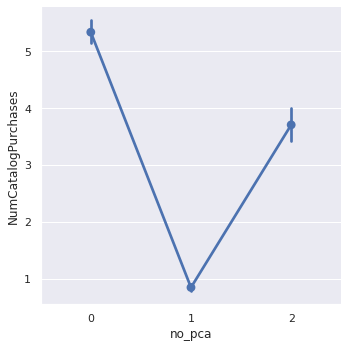

----------------------------------------------------------------------------------------------------
Boxplot untuk kolom NumStorePurchases


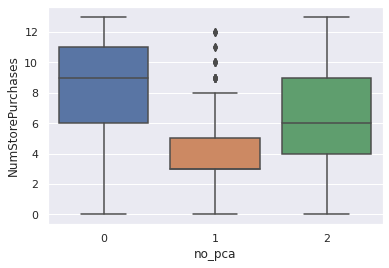

Pointplot untuk kolom NumStorePurchases


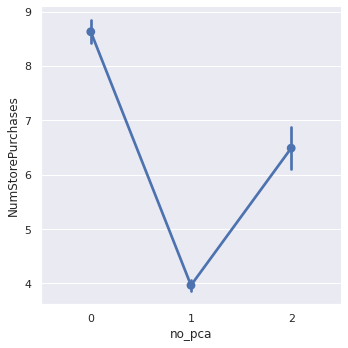

----------------------------------------------------------------------------------------------------
Boxplot untuk kolom Complain


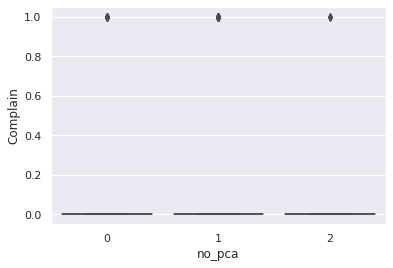

Pointplot untuk kolom Complain


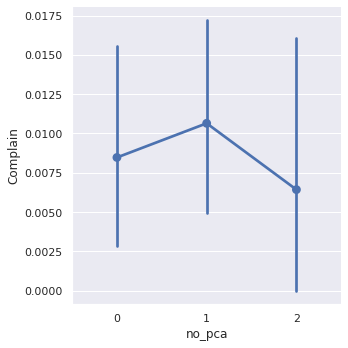

----------------------------------------------------------------------------------------------------
Boxplot untuk kolom Total_kids


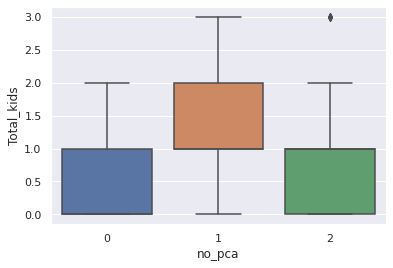

Pointplot untuk kolom Total_kids


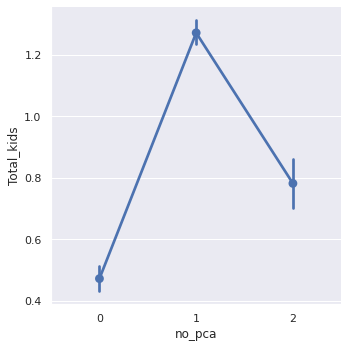

----------------------------------------------------------------------------------------------------
Boxplot untuk kolom CmpAt


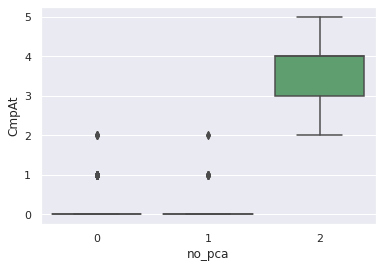

Pointplot untuk kolom CmpAt


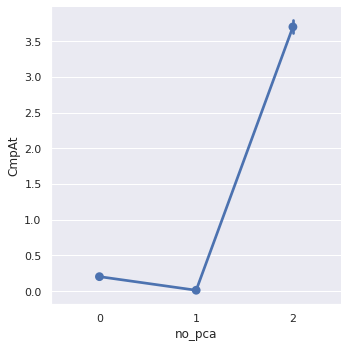

----------------------------------------------------------------------------------------------------
Boxplot untuk kolom spending


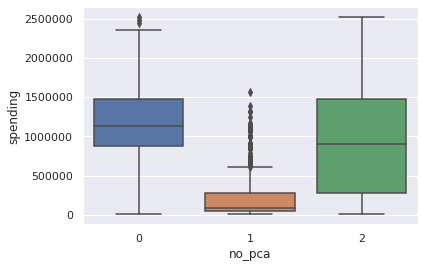

Pointplot untuk kolom spending


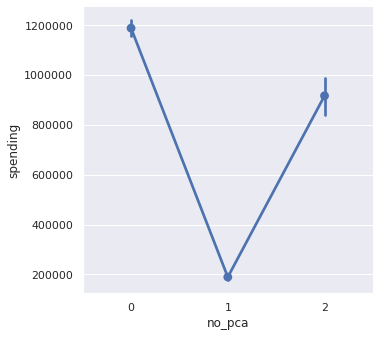

----------------------------------------------------------------------------------------------------
Boxplot untuk kolom WEBConvertion_rate%


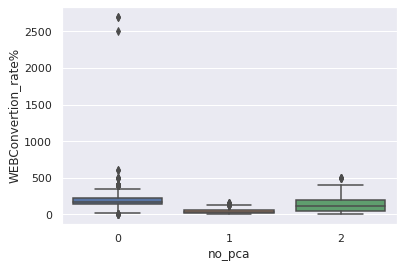

Pointplot untuk kolom WEBConvertion_rate%


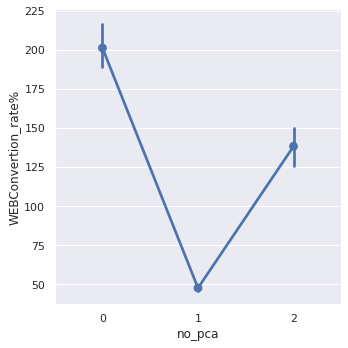

----------------------------------------------------------------------------------------------------
Boxplot untuk kolom Age


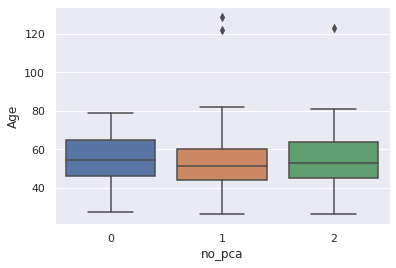

Pointplot untuk kolom Age


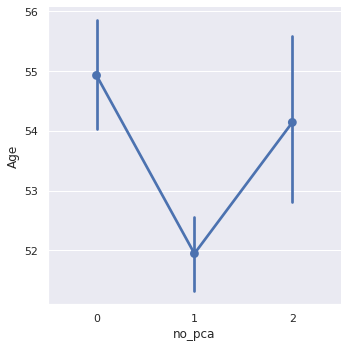

----------------------------------------------------------------------------------------------------
Boxplot untuk kolom Year_Join


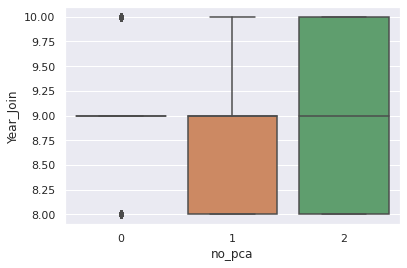

Pointplot untuk kolom Year_Join


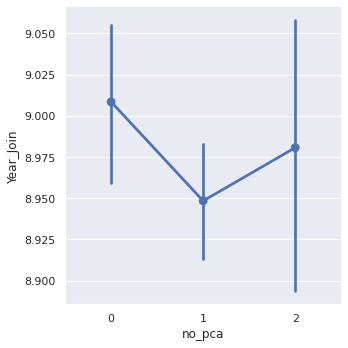

----------------------------------------------------------------------------------------------------


In [ ]:
for i in clus_num.columns:
  print('Boxplot untuk kolom', i)
  sns.boxplot(data=data_drop, y=i, x='no_pca')
  plt.ticklabel_format(style='plain', axis = 'y')
  plt.show()
  print('Pointplot untuk kolom', i)
  sns.catplot(data=data_drop, y=i, x='no_pca', kind='point')
  plt.ticklabel_format(style='plain', axis = 'y')
  plt.show()
  print("-" *100)